In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=pd.read_csv("./adult.csv")
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# About the Dataset:

### We can see that the columns workclass, occupation, and country contains null values.

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: Continuous.

Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

Education-num: Number of years spent in education. Continuous.

Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

Sex: Female, Male.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## Observations
- The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 37.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [25]:
print("Initial shape of the dataset : ", df.shape)
df = df.drop_duplicates(keep = 'first')
print ("Shape of the dataset after dropping the duplicate rows : ", df.shape)

Initial shape of the dataset :  (32537, 15)
Shape of the dataset after dropping the duplicate rows :  (32537, 15)


In [26]:
# Let's Count the occuring of the '?' in all the columns
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == ' ?':
            print (t[' ?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
0
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education-num
0
The Value Counts of ? in marital-status
0
The Value Counts of ? in occupation
0
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital-gain
0
The Value Counts of ? in capital-loss
0
The Value Counts of ? in hours-per-week
0
The Value Counts of ? in country
0
The Value Counts of ? in salary
0


#### Now, the summary shows that the variables - workclass, occupation and country contain missing values. All of these variables are categorical data type. So, Imputing the missing values with the most frequent value- the mode.

In [7]:
for col in ['workclass', 'occupation', 'country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [8]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print (df['hours-per-week'].median())
print (df['hours-per-week'].mean())

40.0
40.44032947106371


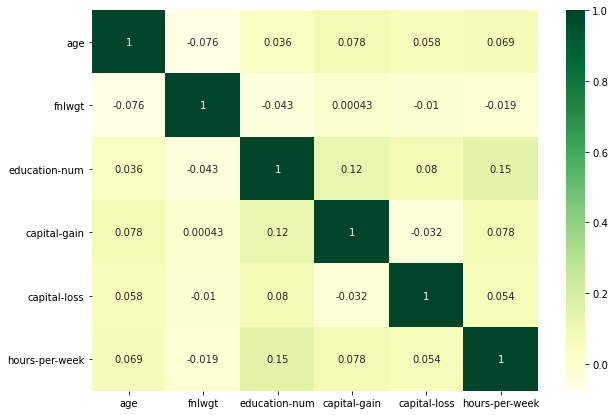

In [9]:
#This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True, color = 'blue', cmap = 'YlGn');

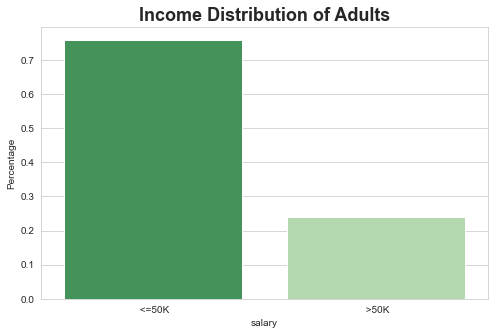

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['salary'].value_counts(normalize = True).rename_axis('salary').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'salary', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')

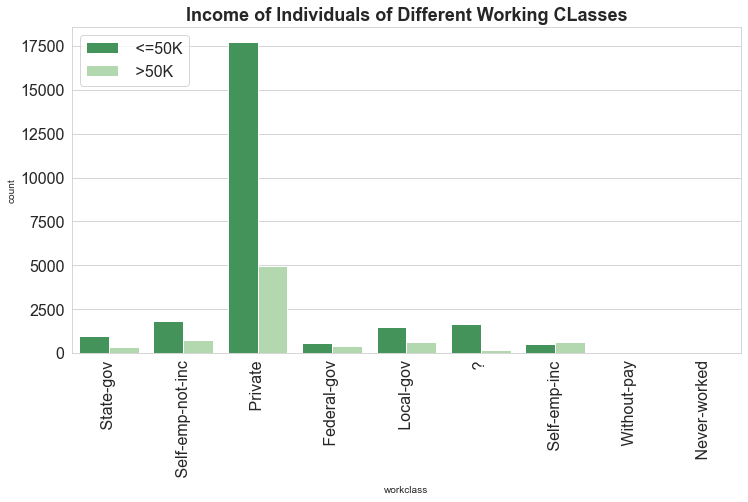

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['workclass'], hue = df['salary'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

- People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.
- People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!

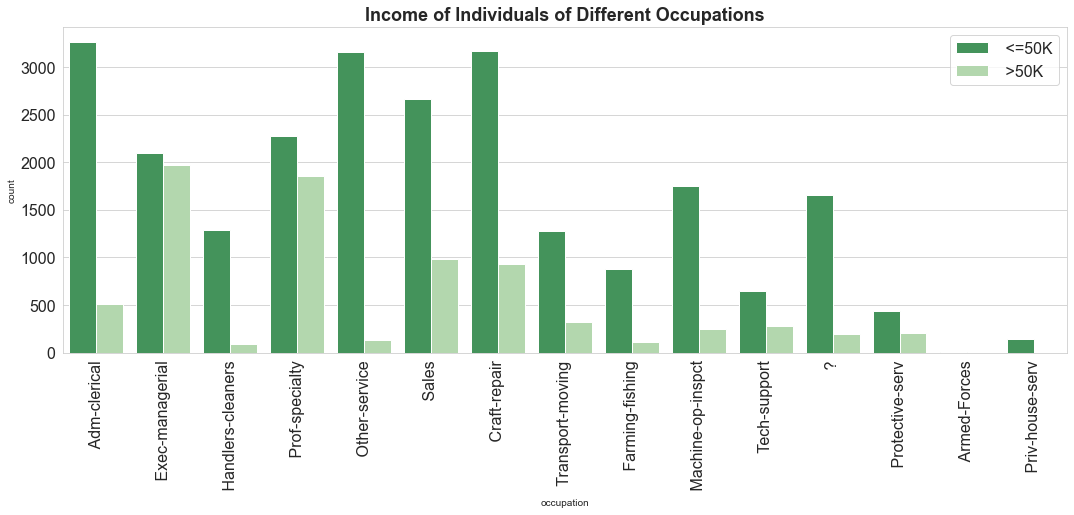

In [12]:
plt.figure(figsize=(18,6))
sns.countplot(df['occupation'], hue = df['salary'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.

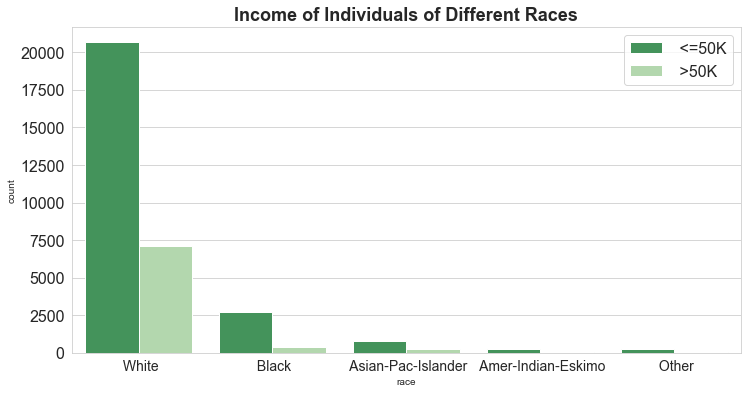

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(df['race'], hue = df['salary'], palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

In [14]:
# Changing the income column into Numerical Value
df['salary'] = df['salary'].map({' <=50K':0, ' >50K':1})

In [15]:
df['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [18]:
# Shuffling the Data Set
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['salary','education'])
target = df['salary']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (22775, 13)
Test data set size :  (9762, 13)


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings; warnings.simplefilter('ignore')

In [20]:

logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

pred_1 = model_1.predict(X_test)

print ("The accuracy of model 1 : ",accuracy_score(y_test, pred_1))
print ("The f1 score of model 1 : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of model 1 :  0.7906166769104692
The f1 score of model 1 :  0.4139908256880734


In [21]:

R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)


pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8544355664822783
The f1 score of model 2 :  0.6715969493875664


In [22]:

import xgboost as xgb
xgb.set_config(verbosity=0)
from xgboost import XGBClassifier
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 500)
model_3 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred_3))
print ("The f1 score of model 3 : ", f1_score(y_test, pred_3, average = 'binary'))

The accuracy of model 3 :  0.8652939971317353
The f1 score of model 3 :  0.7014755959137343


In [50]:
# Training the model 3
import xgboost as xgb
# xgb.set_config(verbosity=0)
from xgboost import XGBClassifier
# boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 500)
boosted_gd = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.065,  
                      colsample_bytree = 0.8,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=5)
model_4 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)

print ("The accuracy of model 4 : ",accuracy_score(y_test, pred_3))
print ("The f1 score of model 4 : ", f1_score(y_test, pred_3, average = 'binary'))

The accuracy of model 4 :  0.8700061462814997
The f1 score of model 4 :  0.7055001160362033


In [47]:
list_pred = [pred_1, pred_2, pred_3, pred_4]
model_names = ["Logistic Regression", "Random Forest Classifier", "Boosted Gradient Descent", "p_xgbooster"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", model_names[i])
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      7395
        >50K       0.64      0.31      0.41      2367

    accuracy                           0.79      9762
   macro avg       0.73      0.63      0.64      9762
weighted avg       0.77      0.79      0.76      9762

Classification Report of  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7395
        >50K       0.74      0.61      0.67      2367

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762

Classification Report of  Boosted Gradient Descent

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7395
        >50K       0.78      0.64      0.71      2367

    accuracy                   

In [48]:
for i, pred in enumerate(list_pred) :
    print ("The Confusion Matrix of : ", model_names[i])
    print (pd.DataFrame(confusion_matrix(y_test, pred)))
    print ()

The Confusion Matrix of :  Logistic Regression
      0    1
0  6996  399
1  1645  722

The Confusion Matrix of :  Random Forest Classifier
      0     1
0  6888   507
1   914  1453

The Confusion Matrix of :  Boosted Gradient Descent
      0     1
0  6973   422
1   847  1520

The Confusion Matrix of :  p_xgbooster
      0     1
0  6973   422
1   847  1520



In [ ]:
adbc = AdaBoostClassifier(n_estimators=500, random_state=0)
adbc.fit(X_train_encoded, y_train)

print(classification_report(y_test, gbc.predict(X_test_encoded)))
print('Train score : ', f1_score(y_train, adbc.predict(X_train_encoded)))
print('test score : ', f1_score(y_test, adbc.predict(X_test_encoded)))

In [57]:
import sklearn as sklearn
gbc = sklearn.ensemble.GradientBoostingClassifier(n_estimators=300, max_depth=5,random_state=0)
gbc.fit(X_train, y_train)

print(classification_report(y_test, gbc.predict(X_test)))

print('test score : ', accuracy_score(y_test, gbc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7395
           1       0.77      0.66      0.71      2367

    accuracy                           0.87      9762
   macro avg       0.83      0.80      0.81      9762
weighted avg       0.87      0.87      0.87      9762

test score :  0.8699037082565048


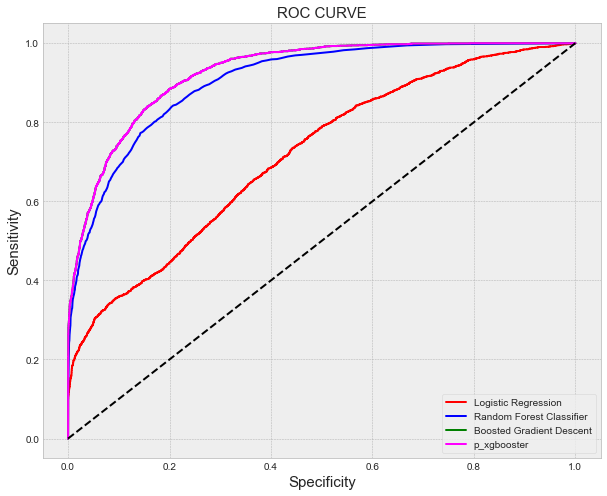

In [49]:
models = [model_1, model_2, model_3, model_4]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()